# Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research Project

## ALL FastAI Resnet 18 Classifier
**Using The ALL Image Database for Image Processing & The Leukemia Blood Cell Image Classification Using Convolutional Neural Network Research Paper**    



The ALL FastAI Resnet 18 Classifier was created by [Salvatore Raieli](https://github.com/salvatorera) based on his [Resnet50](https://github.com/AMLResearchProject/ALL-FastAI-2019/tree/master/Colab-notebooks/ALL-FastAI-Resnet-50.ipynb) project. The classifier provides a Google Colab notebook that uses FastAI with Resnet18 and ALL_IDB2 from the [Acute Lymphoblastic Leukemia Image Database for Image Processing dataset](https://homes.di.unimi.it/scotti/all/). 

## FastAI Resnet18 Classifier Project Contributors

- [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli") - PhD Immunolgy / Bioinformaticia, Bologna, Italy

&nbsp; 

## DISCLAIMER

These projects should be used for research purposes only. The purpose of the projects is to show the potential of Artificial Intelligence for medical support systems such as diagnosis systems.

Although the classifiers are accurate and show good results both on paper and in real world testing, they are not meant to be an alternative to professional medical diagnosis.

Salvatore Raieli is a bioinformatician researcher and PhD in Immunology, but does not work in medical diagnosis. Please use these systems responsibly.

Please use this system responsibly.

&nbsp; 


# ALL Image Database for Image Processing by Fabio Scotti

The [Acute Lymphoblastic Leukemia Image Database for Image Processing](https://homes.di.unimi.it/scotti/all/) dataset created by [Fabio Scotti, Associate Professor Dipartimento di Informatica, Università degli Studi di Milano](https://homes.di.unimi.it/scotti/) is used in this notebook.

Although in the [Leukemia Blood Cell Image Classification Using Convolutional Neural Network](http://www.ijcte.org/vol10/1198-H0012.pdf "Leukemia Blood Cell Image Classification Using Convolutional Neural Network") paper the ALL_IDB1 dataset is used, in this notebook you will use the ALL_IDB2 dataset. After removing 10 images per class for further testing and demonstrations, the dataset will be split into 80% and 20% for training and testing respectively.

## Gain Access To ALL-IDB

You you need to be granted access to use the Acute Lymphoblastic Leukemia Image Database for Image Processing dataset. You can find the application form and information about getting access to the dataset on [this page](https://homes.di.unimi.it/scotti/all/#download) as well as information on how to contribute back to the project [here](https://homes.di.unimi.it/scotti/all/results.php).

# Clone the ALL FastAI 2019 repository

First of all you should clone the [ALL-FastAI-2019](https://github.com/AMLResearchProject/ALL-FastAI-2019 "ALL-FastAI-2019") repository from the [Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research Project](https://github.com/AMLResearchProject "Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research Project") Github Organization. 

To do this, make sure you have Git installed, navigate to the location you want to clone the repository to on your device using terminal/commandline, and then use the following command:

```
  $ git clone https://github.com/AMLResearchProject/ALL-FastAI-2019.git
```

Once you have used the command above you will see a directory called **ALL-FastAI-2019** in the location you chose to clone to. In terminal, navigate to the **ALL-FastAI-2019** directory, this is your project root directory.

# Google Drive / Colab
This tutorial assumes you have access to [Google Drive](https://www.google.com/drive/) with enough space to save the dataset and related files. It is also assumed that you have access to [Google Colab](https://colab.research.google.com).

## Import data to Google Drive
You need to import **ALL_IDB2** from the [Acute Lymphoblastic Leukemia Image Database for Image Processing dataset](https://homes.di.unimi.it/scotti/all/) dataset, to do this you need to request permission from Fabio Scotti, the creator of the dataset. You can request permission by following the steps provided on [this page](https://homes.di.unimi.it/scotti/all/#download). 

Once you have permission you need to upload the negative and positive examples provided in **ALL_IDB2** to your Google Drive. In this tutorial we assume you have uploaded your copy of the dataset to a folder located on your Google drive with the location: *AML-ALL-Classifiers/Python/_FastAI*. Once you have uploaded the dataset you can continue with this tutorial.

## Google Colab 

**You should now be running this tutorial on Google Colab, if not please read this tutorial from the beginning. **  

First we need import the Google Colab Drive library, mount our dataset drive from Google Drive, and set the path to the ALL_IDB2 folder on your drive. Run the following code block to do this. You will be asked to click a link that will authorize the application with the permissions it needs to mount your drive etc. Follow the steps and then past the authorization key into this application.

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
dataset_dir = "/content/gdrive/My Drive/fastai-v3/ALL_IDB2"

Mounted at /content/gdrive


# Import required libraries
We need to import the relevant FastAI libraries, running the following code block with do this and get the paths to the dataset files.

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
fileNames = get_image_files(dataset_dir)
fileNames[:5]

[PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im238_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im235_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im236_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im239_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im237_0.tif')]

# Import datset
Now we need to import the dataset into this notebook. run the following code blocks to import the ALL_IDB2 dataset as a FastAI [DataBunch](https://docs.fast.ai/basic_data.html#DataBunch). In the ImageDataBunch.from_name_re function we can see that we pass the *dataset_dir* we created earlier in the tutorial, fileNames that we created earlier,  pattern for the files, some augmentation, the size of the images we need to replicate Resnet50 input sizes and the number of batches. 

For more information about getting datasets ready with FastAI you can check out [this article](https://docs.fast.ai/vision.data.html#Quickly-get-your-data-ready-for-training).

In [0]:
np.random.seed(2)
pattern = r'/\w+_(\d)\.tif$'

In [6]:
data = ImageDataBunch.from_name_re(dataset_dir, fileNames, pattern, ds_tfms=get_transforms(), 
                                   size=224, bs=64).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (208 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: /content/gdrive/My Drive/fastai-v3/ALL_IDB2;

Valid: LabelList (52 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,1,1,1
Path: /content/gdrive/My Drive/fastai-v3/ALL_IDB2;

Test: None

# data.show_batch()
Now we use the [data.show_batch()](https://docs.fast.ai/basic_data.html#DataBunch.show_batch) function to show a batch of our data. Run the following code block to do this and view the results.

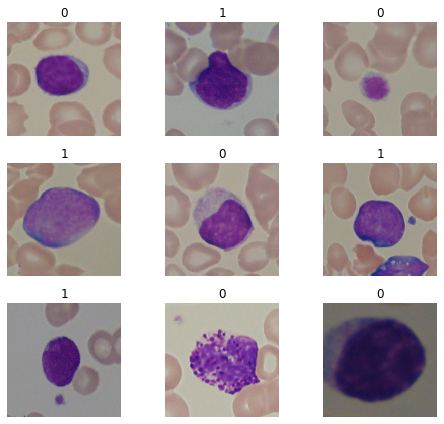

In [7]:
data.show_batch(rows=3, figsize=(7,6))

## View classes info
Now we can run the following code block which will print out the classes list and lengths.

In [8]:
print(data.classes)
len(data.classes),data.c

['0', '1']


(2, 2)

# Resnet18
Now we are going to test how the FastaAI implementation of Resnet18 works with the ALL_IDB2 dataset. 

## Create the convolutional neural network

First we will create the convolutional neural network based on Resnet18, to do this we can use the following code block which uses FastAI  ( [*cnn_learner*](https://docs.fast.ai/vision.learner.html#cnn_learner) previously *create_cnn*) function. We pass the loaded data, specify the resnet18 model, pass error_rate & accuracy as a list for the metrics parameter specifying we want to see both error_rate and accuracy,  and finally specify a weight decay of 1e-1 (1.0).

In [9]:
learn = cnn_learner(data, models.resnet18, metrics=[error_rate,accuracy], wd=1e-1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


## learn.lr_find() & learn.recorder.plot()
Now we will use the [learn.lr_find()](https://docs.fast.ai/basic_train.html#lr_find) function to run LR Finder. LR Finder finds the best learning rate to use with our network. As shown from the output, [learn.recorder.plot()](https://docs.fast.ai/basic_train.html#Recorder.plot) function can be used to view the graph. Run the following code block to view the graph.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


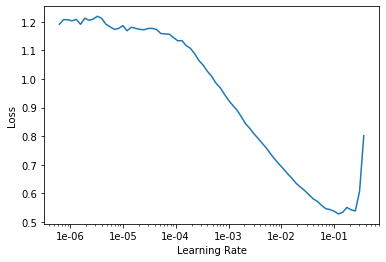

In [10]:
learn.lr_find()
learn.recorder.plot()

## learn.fit_one_cycle() & learn.recorder.plot_losses()
The [learn.fit_one_cycle()](https://docs.fast.ai/basic_train.html#fit_one_cycle) function can be used to fit the model. We use 5 for the parameter *cyc_len* to specify the number of cycles to run, and *max_lr* to specify the maximum learning rate to use which we set as *0.001*. We then use [learn.recorder.plot_losses()](https://docs.fast.ai/basic_train.html#Recorder.plot_losses) to plot the losses from *fit_one_cycle* as a graph.

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.238604,0.940188,0.442308,0.557692,00:27
1,0.938936,0.465836,0.250000,0.750000,00:02
2,0.723285,0.337876,0.134615,0.865385,00:02
3,0.597030,0.287358,0.134615,0.865385,00:02
4,0.502986,0.260262,0.115385,0.884615,00:02


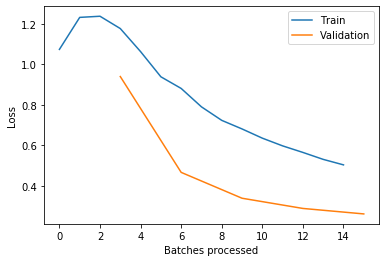

In [11]:
lr = 0.001
learn.fit_one_cycle(cyc_len=5, max_lr=lr)
learn.recorder.plot_losses()

## learn.recorder.plot_lr()
We use  [learn.recorder.plot_lr()](https://docs.fast.ai/basic_train.html#Recorder.plot_lr) to plot the learning rate.

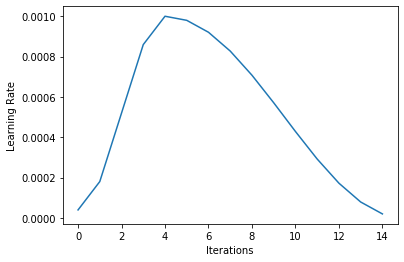

In [12]:
learn.recorder.plot_lr()

## ClassificationInterpretation()
We use  [ClassificationInterpretation()](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation) to visualize interpretations of our model.

In [13]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

## interp.plot_top_losses()
We can use [interp.plot_top_losses()](https://docs.fast.ai/vision.learner.html#plot_top_losses) to view our top losses and their details.

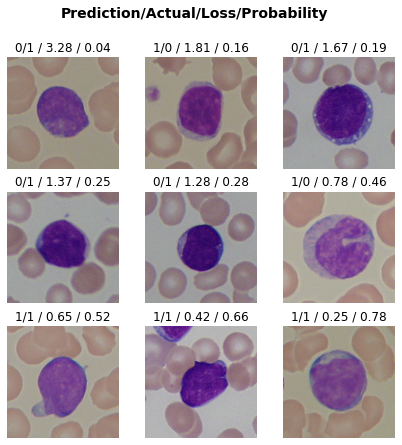

In [14]:
interp.plot_top_losses(9, figsize=(7,7))

## interp.plot_confusion_matrix()
Now we will use  [interp.plot_confusion_matrix()](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation.plot_confusion_matrix) to display a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Below, 24 in the top left square represents 24 true negatives, while 2 in the top right square represents 2 false positives, 3 in the bottom left square represents 3 false negatives, and 22 in the bottom right represents 22
true positives.

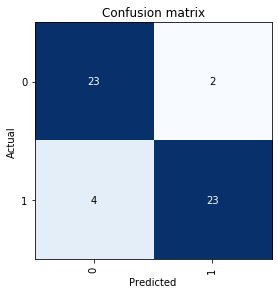

In [15]:
interp.plot_confusion_matrix()

## learn.unfreeze()
Next we use [learn.unfreeze()](https://docs.fast.ai/basic_train.html#Learner.unfreeze) to unfreeze the model.

In [0]:
learn.unfreeze()

## Train the entire (unfrozen) model
Now that we have unfrozen our model, we will use the following code block to train the whole model.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


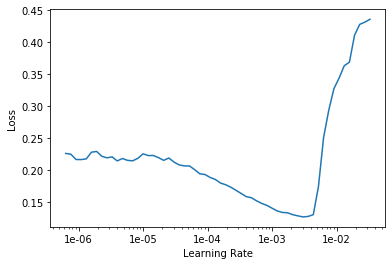

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
nlr = slice(1e-5, 1e-3)
learn.fit_one_cycle(5, nlr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.293262,0.212875,0.096154,0.903846,00:02
1,0.244636,0.130765,0.057692,0.942308,00:02
2,0.190444,0.116298,0.038462,0.961538,00:02
3,0.164887,0.125518,0.038462,0.961538,00:02
4,0.149136,0.137060,0.057692,0.942308,00:02


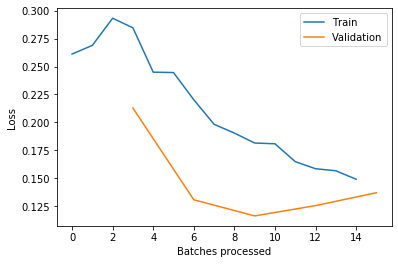

In [19]:
learn.recorder.plot_losses()

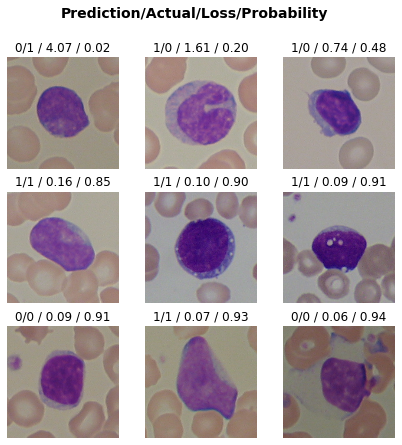

In [20]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

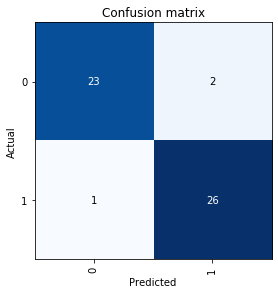

In [21]:
interp.plot_confusion_matrix()

# Contributing

The Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research project encourages and welcomes code contributions, bug fixes and enhancements from the Github.

Please read the [CONTRIBUTING](https://github.com/AMLResearchProject/ALL-FastAI-2019/blob/master/CONTRIBUTING.md "CONTRIBUTING") document for a full guide to forking our repositories and submitting your pull requests. You will also find information about our code of conduct on this page.

## Contributors

- [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli") - [Peter Moss Leukemia AI Research](https://www.leukemiaresearchassociation.ai "Peter Moss Leukemia AI Research") & Biogenera, Bologna, Italy

&nbsp;

# Versioning

We use SemVer for versioning. For the versions available, see [Releases](https://github.com/AMLResearchProject/ALL-FastAI-2019/releases "Releases").

# License

This project is licensed under the **MIT License** - see the [LICENSE](https://github.com/AMLResearchProject/ALL-FastAI-2019/blob/master/LICENSE "LICENSE") file for details.

# Bugs/Issues

We use the [repo issues](https://github.com/AMLResearchProject/ALL-FastAI-2019/issues "repo issues") to track bugs and general requests related to using this project. See [CONTRIBUTING](https://github.com/AMLResearchProject/ALL-FastAI-2019/blob/master/CONTRIBUTING.md "CONTRIBUTING") for more info on how to submit bugs, feature requests and proposals.